# Linear Algebra with Numpy (discussion!)

*This worksheet was originally designed by [Erin George](https://www.math.ucla.edu/~egeo/) (Department of Mathematics, UCLA). It has been subsequently revised by later TAs and instructors.*


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(12)

## SVD and Friends

There are lots of circumstances in which we should compute the singular value decomposition (SVD) or eigenvalue decomposition of a matrix. SVD is more general and somewhat more useful. 

As you may remember, a *[singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)* of a real matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ is 

$$\mathbf{A} = \mathbf{U}\mathbf{D}\mathbf{V}^T\;, $$

where $\mathbf{D} \in \mathbb{R}^{m \times n}$ has nonzero entries (the *singular values* $\sigma_i$) only along its diagonal, and where $\mathbf{U} \in \mathbb{R}^{m \times m}$ and $\mathbf{V} \in \mathbb{R}^{n \times n}$ are orthogonal matrices. The singular values $\sigma_i$ collectively give some measure of how "large" the matrix $\mathbf{A}$ is. 

Numpy makes it easy to compute the SVD of a matrix: 

In [2]:
A = np.random.randint(1, 5, size = (7, 5))
A

array([[4, 4, 3, 2, 2],
       [3, 4, 4, 1, 1],
       [3, 2, 1, 2, 2],
       [2, 3, 4, 3, 3],
       [1, 2, 1, 1, 2],
       [3, 2, 4, 3, 1],
       [4, 2, 3, 4, 4]])

In [3]:
U, sigma, V = np.linalg.svd(A)

In [4]:
sigma # singular values

array([15.77056318,  3.58223689,  2.47757581,  2.01835309,  0.49475731])

We can use the components of the SVD to reconstruct the original matrix $\mathbf{A}$. 

In [5]:
D = np.zeros_like(A,dtype=float) # matrix of zeros of same shape as A
D[:5,:5] = np.diag(sigma)
D

array([[15.77056318,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.58223689,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.47757581,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  2.01835309,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.49475731],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [6]:
U @ D @ V # == A up to numerical precision

array([[4., 4., 3., 2., 2.],
       [3., 4., 4., 1., 1.],
       [3., 2., 1., 2., 2.],
       [2., 3., 4., 3., 3.],
       [1., 2., 1., 1., 2.],
       [3., 2., 4., 3., 1.],
       [4., 2., 3., 4., 4.]])

In [7]:
# low-rank approximation of A
D = np.zeros_like(A,dtype=float) # matrix of zeros of same shape as A
D[:2,:2] = np.diag(sigma[:2])
D

array([[15.77056318,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.58223689,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [8]:
U @ D @ V # close to A, using only two singular vectors

array([[3.35983999, 3.58111013, 3.80359077, 2.28880029, 1.96612077],
       [2.9377458 , 3.99729674, 4.01426478, 1.2350215 , 0.81011855],
       [2.22044418, 1.58841506, 1.89500597, 2.20116248, 2.11619664],
       [3.30775316, 2.92829242, 3.26978192, 2.7817622 , 2.56254206],
       [1.514434  , 1.23789253, 1.41531888, 1.36456857, 1.28114648],
       [2.94601463, 2.93235732, 3.17001253, 2.19062659, 1.94192318],
       [3.76604731, 2.25858941, 2.8678747 , 4.11862872, 4.04630417]])

## Application: Image Compression

To illustrate the power of SVD, let's use it to *compress images*. In general, storing an image with $m \times n$ greyscale pixels requires storing $m \times n$ numbers, which can be quite expensive when $m$ or $n$ are large! SVD can be used to compress images by treating them as matrices and discarding the small singular values. Let's see an example. 

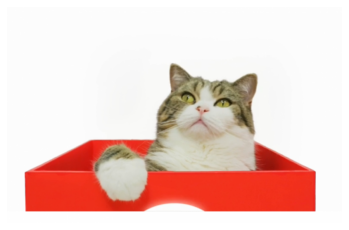

In [9]:
from matplotlib.image import imread 
maru = imread("https://i.pinimg.com/originals/0e/d0/23/0ed023847cad0d652d6371c3e53d1482.png")
plt.imshow(maru)
plt.gca().axis("off")
plt.show()

Basic SVD for images only works on greyscale images -- there are ways to use SVD for color images, but this is beyond the scope of the course. The following simple function will convert the base image to greyscale: 

In [10]:
def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

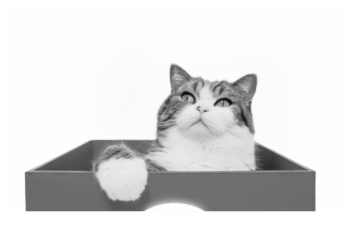

In [11]:
grey_maru = to_greyscale(maru)
plt.imshow(grey_maru, cmap = "Greys")
plt.gca().axis("off")
plt.show()

Now we can write a function that encapsulates the steps we did in the previous section to compress the matrix, keeping only the top $k$ singular values in order to reconstruct the target matrix. 

In [12]:
def reconstruct(gs, k):
    U, sigma, V = np.linalg.svd(gs)
    D = np.zeros_like(gs,dtype=float) # matrix of zeros of same shape as A
    D[:k,:k] = np.diag(sigma[:k])
    return U @ D @ V

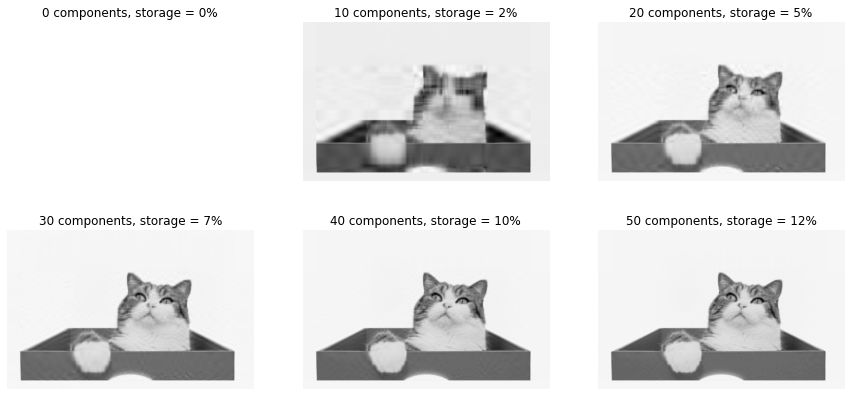

In [13]:
fig, axarr = plt.subplots(2, 3, figsize = (15, 7))

for i in range(6):
    row = i // 3
    col = i % 3
    axarr[row, col].imshow(reconstruct(grey_maru, i*10), cmap = "Greys") 
    axarr[row, col].set(title = f"{i*10} components, storage = {int(np.round(i*10 / np.min(grey_maru.shape),2)*100)}%")
    axarr[row, col].axis("off")

# plt.imshow(reconstruct(gs,20), cmap = "Greys")

## Principal Component Analysis

We can use SVD on more that just images.  Say we have a data set like those used in machine learning.  That is, we have a group of $n$ points all with the same number of features $d$.  We can represent this as a numpy array wth shape $(n, d)$, which is the same thing as a $n \times d$ matrix $\mathbf{A}$.

What happens when we apply SVD to this matrix?  Does something interesting happen?

The answer is yes, something very interesting happens!  The SVD composition of the data is very useful.  It is *particularly* useful when all the columns (features) of $\mathbf{A}$ have mean 0, in which case it is called *principal component analysis (PCA)*.  If the columns don't have mean 0, it's easy enough to modify the data so they do.  You might remember that this is common in certain machine learning applications anyway!

When we are doing PCA, we call the vectors (rows) in $\mathbf{V}$ the *principal components* and the singular values *principal values*.  We then perform a *change of basis* and use the matrix $\mathbf{AV}^T$ in place of our original data matrix.  This gives us a new way of representing the data.  Each column of the new matrix corresponds to the data projected onto each principal component.

This new representation has the following properties:
1. The principal components with the largest principal values captures the most amount of variance of the data (we can think of this as "information" in some sense).
 - The variance of a dimension is the square of the principal value of the corresponding principal component.
2. The amount of redundant information between the new features is minimized.
 - The correlation (and covariance) of two features in this representation is 0.
3. Each feature still has 0 mean.

This gives two immediate applications for PCA.  We can use PCA to identify key trends in our data.  This works somewhat like linear regression, although it is slightly different.  We can also use PCA for *dimensionality reduction*.  This works very similar to the compression example we just saw: we represent the data as accurately as possible using fewer dimensions.  This can make some data analysis easier.

Let's do an example.  The data below contains two classes with 100 points each and 30 features for each point.  Just looking at the data in a table does not make it clear how the classes can be separated.

In [14]:
df = pd.read_csv('https://www.math.ucla.edu/~egeo/classes/spr21_pic16b-1/week4/pca_data.csv')
df

,Class,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,A,1.312678,-0.872416,-0.633608,-1.439975,-0.373333,0.354137,-0.017679,-0.358447,2.175924,...,-0.095110,0.427809,-0.246705,-0.468356,-0.003928,-0.305584,0.589755,-0.887910,-0.226349,1.017559
1,A,-0.554571,0.267243,0.786710,1.726104,-0.228050,-0.684041,-0.555496,-1.070765,0.575482,...,0.146280,-1.152594,-1.028352,-0.159039,-0.114474,-0.866831,0.060871,1.629934,0.829193,1.019745
2,A,-0.198848,-1.421051,0.885382,2.247486,1.093574,-0.072108,0.818152,-0.419727,0.620939,...,-1.409122,0.486434,-0.939722,0.047736,0.022510,0.288844,0.762967,2.091878,-1.037263,0.743345
3,A,0.548145,1.362666,-0.233830,0.484760,0.229146,1.916645,-1.097691,-0.399320,-0.232312,...,0.911222,1.278860,-1.841462,0.050391,2.507021,0.298596,-0.509395,0.284838,0.888554,0.299975
4,A,0.220285,0.215366,0.834116,-0.114891,0.716938,0.961981,0.266085,0.233733,-0.843185,...,-0.613175,0.135682,-0.954285,1.439100,-0.193177,-0.925859,-1.312306,2.550257,1.045257,1.192234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,B,2.760203,1.986474,1.695143,0.846955,-1.425168,0.940869,0.759324,-1.830695,-1.543642,...,0.800839,0.062080,-0.020842,0.348433,0.605236,-2.769704,1.521694,0.897539,0.737613,-0.093165
196,B,-0.310492,0.577135,0.298263,1.516307,-0.672252,-0.638947,-1.013484,-2.788448,0.040686,...,-1.105967,0.552279,0.415910,-0.083357,-2.605288,1.231185,1.718624,1.336351,-0.523698,-0.304734
197,B,1.413706,-3.355600,0.200682,-0.535410,0.776446,1.245008,-0.858392,1.678614,-0.061365,...,0.545061,0.328626,0.725111,-0.121144,0.462170,1.491636,1.480581,-1.254294,-0.575435,-1.348853
198,B,0.624647,-0.335708,0.780868,-2.476268,0.575201,0.615047,-0.811140,-1.338157,0.776958,...,0.154411,-0.593237,0.618608,0.098532,0.847984,-0.914988,0.370306,-1.779357,-0.155245,-0.889333


Even if we plot the first two columns, it's very unclear.

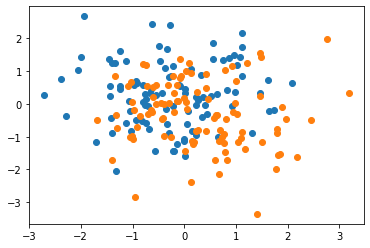

In [15]:
plt.scatter(df.loc[df['Class']=='A','0'],df.loc[df['Class']=='A','1'])
plt.scatter(df.loc[df['Class']=='B','0'],df.loc[df['Class']=='B','1'])
plt.show()

If we picked any two other columns, we're going to get a similarly unhelpful result.  For example:

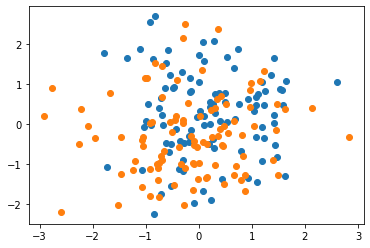

In [16]:
import random
row, col = random.sample(range(30), 2)

plt.scatter(df.loc[df['Class']=='A',f'{row}'],df.loc[df['Class']=='A',f'{col}'])
plt.scatter(df.loc[df['Class']=='B',f'{row}'],df.loc[df['Class']=='B',f'{col}'])
plt.show()

However, if we do PCA:

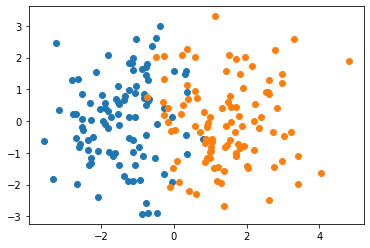

In [17]:
data = df.loc[:,'0':].to_numpy()
data_zeroed = data - np.mean(data,axis=0)

U, sigma, V = np.linalg.svd(data_zeroed)

data_pca = data_zeroed @ V.T

plt.scatter(data_pca[:100,0],data_pca[:100,1])
plt.scatter(data_pca[100:,0],data_pca[100:,1])
plt.show()

It's not perfect, but things are much more separated now.  Let's look at the first principal component.

In [18]:
print(V[0,:])

[ 0.21629623 -0.23859924  0.10102281 -0.16265315  0.08516334 -0.17525737
  0.11080652 -0.0707273   0.13531475 -0.08698843  0.19651082 -0.10487755
  0.21280597 -0.21546274  0.14544349 -0.27240408  0.21562661 -0.12496705
  0.21016702 -0.12285     0.13595645 -0.29552797  0.27605938 -0.12523383
  0.1786243  -0.16993927  0.1163923  -0.23617178  0.2370046  -0.19090967]


Does this correspond to an actual pattern in the data?  The answer is yes!  The means of the two datasets, shown below, alternates between B being higher and A being higher.  We can see that this pattern in the principal component above as it alternates between positive and negative.

In [19]:
display(df.groupby('Class').mean())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Class,,,,,,,,,,,,,,,,,,,,,
A,-0.269946,0.295474,-0.168205,0.258941,-0.160542,0.348394,-0.207074,0.099514,-0.197678,0.156699,...,-0.250205,0.380429,-0.319292,0.165454,-0.2372,0.179655,-0.289613,0.275651,-0.326301,0.243396
B,0.269946,-0.295474,0.168205,-0.258941,0.160542,-0.348394,0.207074,-0.099514,0.197678,-0.156699,...,0.250205,-0.380429,0.319292,-0.165454,0.2372,-0.179655,0.289613,-0.275651,0.326301,-0.243396
